### Compare results of the different models

In [3]:
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat
import numpy as np

/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
### Aggregate all results in one file

In [16]:
path = 'data/PROCESSED/MODEL_OUTPUTS'

In [40]:
r = re.compile(f'.*_performance_overall.csv$') # only csv files
files = list(filter(r.match, os.listdir(path))) 
res = sorted(files)

In [44]:
r = re.compile(f'.*-minmax')
files = list(filter(r.match, res)) 
res1 = sorted(files)

In [48]:
res2= sorted(list(set(res) - set(res1)))

In [155]:
results = pd.DataFrame()
for f in range(len(res2)):
    df = pd.read_csv(f'{path}/{res2[f]}')
    df['epochs'] = df['Unnamed: 0'].apply(lambda row: int(row.split('_')[-1]) if row.split('_')[-1] in ['5','20','50','100','150','250'] else 20)
    df['window'] = df['Unnamed: 0'].apply(lambda row: row.split('_')[-3]+'_'+row.split('_')[-2] if row.split('_')[-1] in ['5','20','50','100','150','250'] else row.split('_')[-2]+'_'+row.split('_')[-1])
    df['freq'] = df['Unnamed: 0'].apply(lambda row: row.split('_')[-4] if row.split('_')[-1] in ['5','20','50','100','150','250'] else row.split('_')[-3])
    df['model'] = df['Unnamed: 0'].apply(lambda row: row.split('_')[0])
    df['station'] =res2[f].split('_')[0]
    df['file'] = f'{res2[f]}'
    results = results.append(df)

In [215]:
results = results[~results['model'].isin(['BaselineLast','BaselineRepeat'])]

In [137]:
stations= ['guadalupe',
           'banos',
           'aeropuerto',
         'quisapincha',
         'chiquiurco',
         'AJSucre',
         'JAlvarez',
         'pfc-hgpt',
         'calamaca',
         'mulaCorral',
         'pampasSalasaca',
         'tasinteo',
         'pisayambo',
         'cunchibamba']

In [216]:
results = results[(results['station'].isin(stations)) & ~(results['window'].isin(['w576_288','w192_96', 'w96_48'])) & (results['mae_test']<0.6)]
results

,Unnamed: 0,loss_test,mae_test,loss_val,mae_val,epochs,window,freq,model,station,file
1,MultiLinear_60m_w24_12,0.483552,0.423504,0.439122,0.399172,20,w24_12,60m,MultiLinear,AJSucre,AJSucre_multi_60m_w24_12_performance_overall.csv
2,MultiDense_60m_w24_12,0.396101,0.362826,0.365817,0.342350,20,w24_12,60m,MultiDense,AJSucre,AJSucre_multi_60m_w24_12_performance_overall.csv
3,MultiConv_60m_w24_12,0.391945,0.360213,0.363291,0.339760,20,w24_12,60m,MultiConv,AJSucre,AJSucre_multi_60m_w24_12_performance_overall.csv
4,MultiLSTM_model_60m_w24_12,0.386219,0.367019,0.358438,0.346414,20,w24_12,60m,MultiLSTM,AJSucre,AJSucre_multi_60m_w24_12_performance_overall.csv
5,AR_LSTM_60m_w24_12,0.383760,0.368215,0.357675,0.349274,20,w24_12,60m,AR,AJSucre,AJSucre_multi_60m_w24_12_performance_overall.csv
...,...,...,...,...,...,...,...,...,...,...,...
1,MultiLinear_60m_w72_48,0.466857,0.436734,0.367463,0.378324,20,w72_48,60m,MultiLinear,tasinteo,tasinteo_multi_60m_w72_48_performance_overall.csv
2,MultiDense_60m_w72_48,0.416033,0.403345,0.307051,0.329152,20,w72_48,60m,MultiDense,tasinteo,tasinteo_multi_60m_w72_48_performance_overall.csv
3,MultiConv_60m_w72_48,0.414283,0.404766,0.308108,0.334269,20,w72_48,60m,MultiConv,tasinteo,tasinteo_multi_60m_w72_48_performance_overall.csv
4,MultiLSTM_model_60m_w72_48,0.425136,0.422176,0.311359,0.345627,20,w72_48,60m,MultiLSTM,tasinteo,tasinteo_multi_60m_w72_48_performance_overall.csv


### ANOVA Window

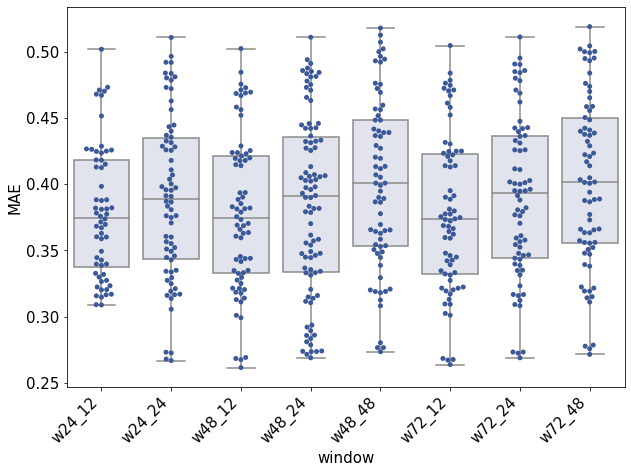

In [129]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.boxplot(x='window', y='mae_test', data=results, color='#DFE3EE')
ax = sns.swarmplot(x="window", y="mae_test", data=results, color='#3B5998')
ax.set_xlabel("window",fontsize=15)
ax.set_ylabel("MAE",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(labels=results.window.unique(),rotation = 45, ha="right")
plt.show()
fig.savefig(f'{path}/boxplot_window.png',dpi = 75)

In [130]:
res = stat()
res.anova_stat(df=results, res_var='mae_test', anova_model='mae_test ~ C(window)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(window),7.0,0.043555,0.006222,1.625198,0.125548
Residual,562.0,2.151666,0.003829,NaN,NaN


In [131]:
res = stat()
res.tukey_hsd(df=results, res_var='mae_test', xfac_var='window', anova_model='mae_test ~ C(window)')
test = res.tukey_summary
test[test['p-value']<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value


In [132]:
#### Differences between the shortes and longets periods

### ANOVA Model

In [142]:
results.model.unique()

array(['Linear', 'MLP', 'CNN', 'LSTM', 'AR-LSTM'], dtype=object)

In [141]:
results['model'].replace({'MultiLinear':'Linear','MultiDense':'MLP','MultiConv':'CNN','MultiLSTM':'LSTM','AR':'AR-LSTM'}, inplace=True)

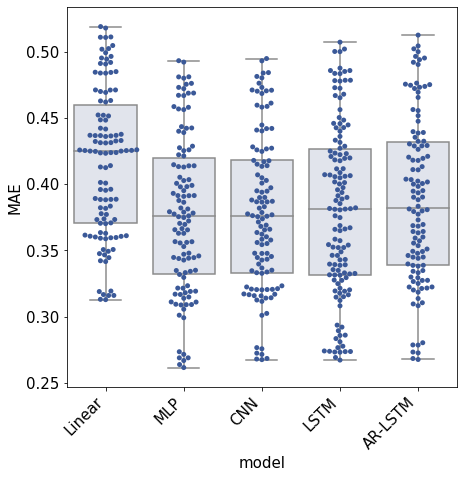

In [90]:
fig, ax = plt.subplots(figsize = (7,7))
ax = sns.boxplot(x='model', y='mae_test', data=results, color='#DFE3EE')
ax = sns.swarmplot(x='model', y="mae_test", data=results, color='#3B5998')
ax.set_xlabel('model',fontsize=15)
ax.set_ylabel("MAE",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(labels=['Linear', 'MLP', 'CNN', 'LSTM', 'AR-LSTM'],rotation = 45, ha="right")
plt.show()
fig.savefig(f'{path}/boxplot_model.png',dpi = 75,bbox_inches='tight')

In [143]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=results, res_var='mae_test', anova_model='mae_test ~ C(model)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),4.0,0.121992,0.030498,8.311397,0.000002
Residual,565.0,2.073229,0.003669,NaN,NaN


In [144]:
res = stat()
res.tukey_hsd(df=results, res_var='mae_test', xfac_var='model', anova_model='mae_test ~ C(model)')
test = res.tukey_summary
test[test['p-value']<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Linear,MLP,0.039576,0.017223,0.061929,6.852152,0.001000
1,Linear,CNN,0.038690,0.016337,0.061043,6.698806,0.001000
2,Linear,LSTM,0.036258,0.014782,0.057734,6.534049,0.001000
3,Linear,AR-LSTM,0.029132,0.006780,0.051485,5.043983,0.003587


In [45]:
####  MultiLinear is worse than others. No signiff difference in the rest

### ANOVA Agregagtion

In [93]:
results.station.unique()

array(['AJSucre', 'JAlvarez', 'aeropuerto', 'banos', 'calamaca',
       'chiquiurco', 'cunchibamba', 'guadalupe', 'mulaCorral',
       'pampasSalasaca', 'pfc-hgpt', 'pisayambo', 'quisapincha',
       'tasinteo'], dtype=object)

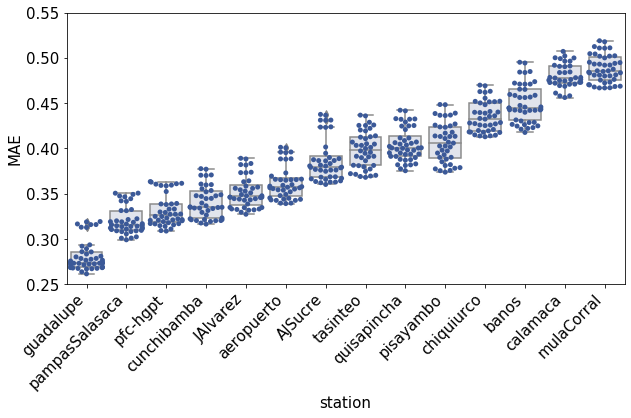

In [217]:
grouped = results.loc[:,['station', 'mae_test']] \
    .groupby(['station']) \
    .median() \
    .sort_values(by='mae_test')

fig, ax =plt.subplots(figsize=(10,5))
ax = sns.boxplot(x='station', y='mae_test', data=results, color='#DFE3EE',order=grouped.index)
ax = sns.swarmplot(x="station", y="mae_test", data=results, color='#3B5998',order=grouped.index)
ax.set_xlabel('station',fontsize=15)
ax.set_ylabel("MAE",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(labels = grouped.index,rotation = 45, ha="right")
ax.set_ylim(0.25,0.55)

plt.show()
fig.savefig(f'{path}/boxplot_stations.png',dpi = 75,bbox_inches='tight')

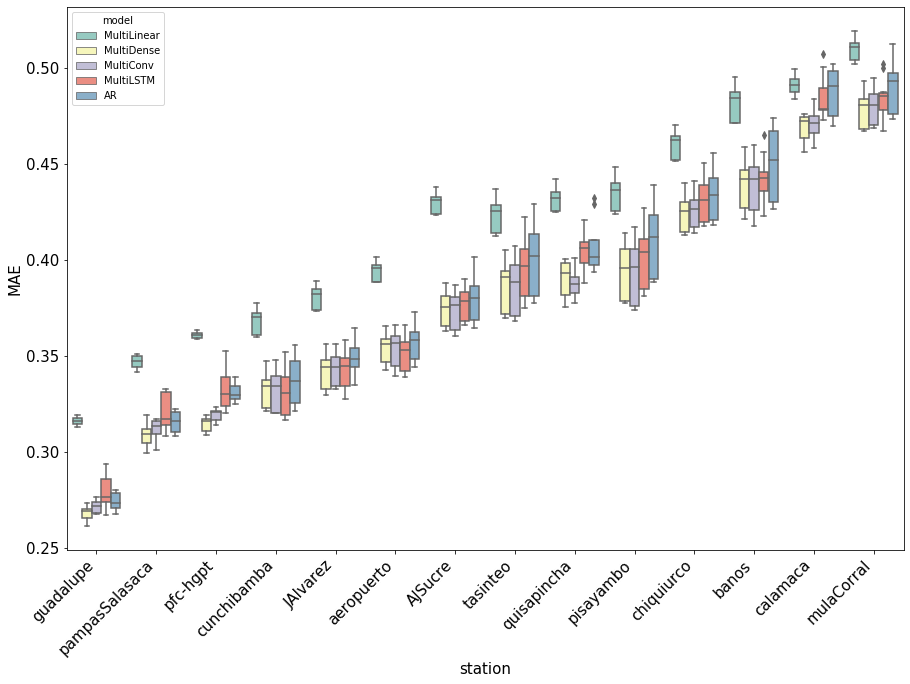

In [119]:
grouped = results.loc[:,['station', 'mae_test']] \
    .groupby(['station']) \
    .median() \
    .sort_values(by='mae_test')

fig, ax =plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="station", y="mae_test", hue="model", data=results, palette="Set3",order =grouped.index) 
#ax = sns.swarmplot(x="station", y="mae_test", data=results, color='#3B5998',order=grouped.index)
ax.set_xlabel('station',fontsize=15)
ax.set_ylabel("MAE",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(labels = grouped.index,rotation = 45, ha="right")
#ax.legend(labels = ['Linear','MLP','CNN','LSTM','AR-LSTM'])
# ax.legend().get_texts()[0].set_text('Linear')
# ax.legend().get_texts()[1].set_text('MLP')
# ax.legend().get_texts()[2].set_text('CNN')
# ax.legend().get_texts()[3].set_text('LSTM')
# ax.legend().get_texts()[3].set_text('AR-LSTM')

plt.show()
fig.savefig(f'{path}/boxplot_stations_models.png',dpi = 75,bbox_inches='tight')


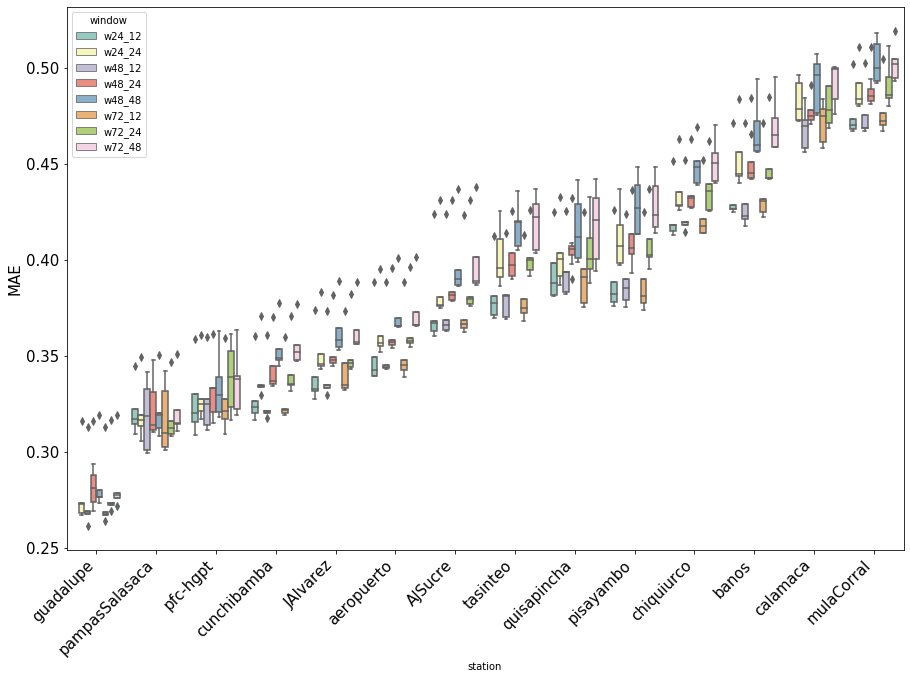

In [121]:
grouped = results.loc[:,['station', 'mae_test']] \
    .groupby(['station']) \
    .median() \
    .sort_values(by='mae_test')

fig, ax =plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="station", y="mae_test", hue="window", data=results, palette="Set3",order =grouped.index) 
ax.set_ylabel("MAE",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(labels = grouped.index,rotation = 45, ha="right")
#ax.legend(labels = ['Linear','MLP','CNN','LSTM','AR-LSTM'])
# ax.legend().get_texts()[0].set_text('Linear')
# ax.legend().get_texts()[1].set_text('MLP')
# ax.legend().get_texts()[2].set_text('CNN')
# ax.legend().get_texts()[3].set_text('LSTM')
# ax.legend().get_texts()[3].set_text('AR-LSTM')

plt.show()
fig.savefig(f'{path}/boxplot_stations_window.png',dpi = 75,bbox_inches='tight')


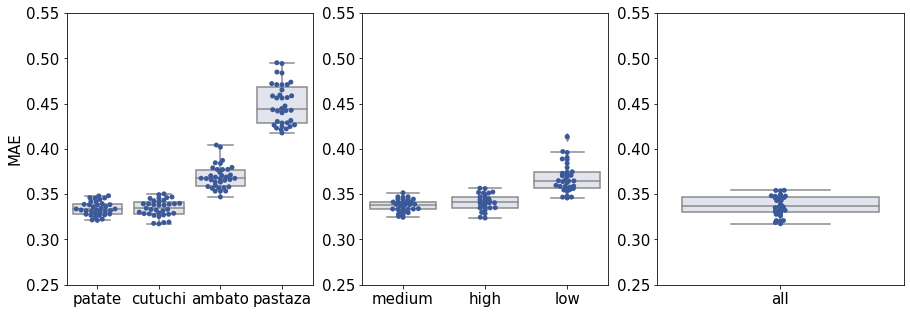

In [214]:
groups_all =[['cutuchi','patate','pastaza','ambato'],['high','medium','low'],['all']]
fig, axes =plt.subplots(nrows=1, ncols=3,figsize=(15,5))

for a,ax in enumerate(axes.flatten()):
    
    groups = results[results.station.isin(groups_all[a])]
    grouped = groups.loc[:,['station', 'mae_test']] \
    .groupby(['station']) \
    .median() \
    .sort_values(by='mae_test')
    
    sns.boxplot(x='station', y='mae_test', data=groups, color='#DFE3EE',order=grouped.index, ax = ax)
    sns.swarmplot(x="station", y="mae_test", data=groups, color='#3B5998',order=grouped.index, ax = ax)
    if a == 0:
        ax.set_ylabel("MAE",fontsize=15)
    else:
        ax.set_ylabel("",fontsize=15)
    ax.set_xlabel("",fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(labels = grouped.index, ha="center")
    ax.set_ylim(0.25,0.55)
fig.savefig(f'{path}/boxplot_groups.png',dpi = 75,bbox_inches='tight')

In [106]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=groups, res_var='mae_test', anova_model='mae_test ~ C(station)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(station),7.0,0.361819,0.051688,298.379984,1.156336e-123
Residual,272.0,0.047119,0.000173,NaN,NaN


In [108]:
res = stat()
res.tukey_hsd(df=groups, res_var='mae_test', xfac_var='station', anova_model='mae_test ~ C(station)')
test = res.tukey_summary
test[test['p-value']<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,all,ambato,0.016989,0.007683,0.026294,7.886654,0.001000
1,all,cutuchi,0.017593,0.008287,0.026898,8.167232,0.001000
2,all,high,0.011103,0.001393,0.020813,4.939615,0.012841
3,all,low,0.015931,0.006626,0.025237,7.395815,0.001000
4,all,medium,0.014831,0.005526,0.024137,6.885179,0.001000
5,all,pastaza,0.097279,0.087973,0.106584,45.159964,0.001000
6,all,patate,0.017813,0.008508,0.027119,8.269412,0.001000
7,ambato,cutuchi,0.034581,0.024971,0.044192,15.544109,0.001000
8,ambato,high,0.028092,0.018089,0.038095,12.131653,0.001000
10,ambato,medium,0.031820,0.022209,0.041430,14.302766,0.001000


### 2 way ANOVA model + window

In [8]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=results, res_var='mae_test', anova_model='mae_test~C(model)+C(window)+C(model):C(window)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(model),4.0,0.087820,0.021955,7.061015,0.000014
C(window),7.0,0.048397,0.006914,2.223567,0.030709
C(model):C(window),28.0,0.004489,0.000160,0.051557,1.000000
Residual,670.0,2.083257,0.003109,NaN,NaN


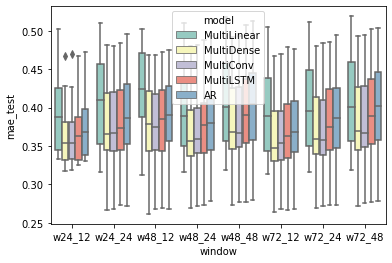

In [12]:
sns.boxplot(x="window", y="mae_test", hue="model", data=results, palette="Set3") 

### 2 way ANOVA window + station

In [10]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=results, res_var='mae_test', anova_model='mae_test~C(window)+C(station)+C(window):C(station)')
res.anova_summary
### There is no intercation model/window

/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 15
  'rank is %d' % (J, J_), ValueWarning)
/Users/tamarahuete/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 126, but rank is 118
  'rank is %d' % (J, J_), ValueWarning)


,df,sum_sq,mean_sq,F,PR(>F)
C(window),7.0,0.056934,0.008133,34.330955,6.197033e-40
C(station),18.0,1.575072,0.087504,369.351136,2.958816e-281
C(window):C(station),126.0,0.756582,0.006005,25.345283,4.768277e-165
Residual,568.0,0.134566,0.000237,NaN,NaN


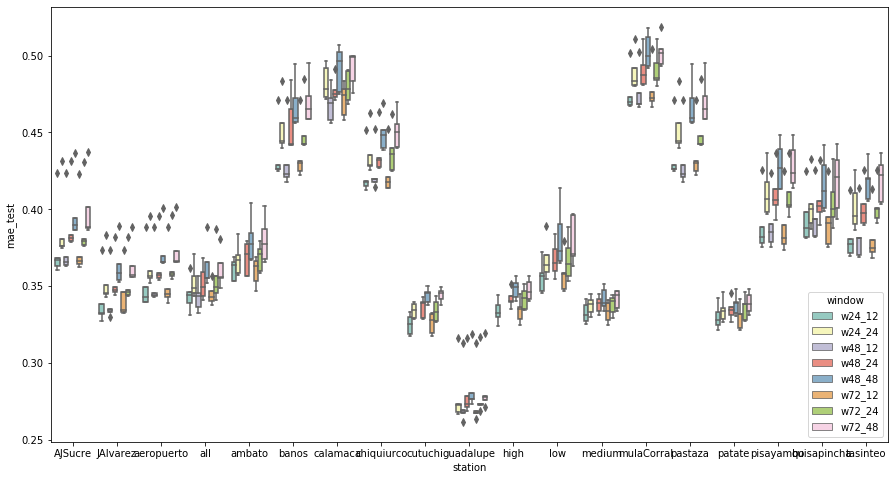

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x="station", y="mae_test", hue="window", data=results, palette="Set3") 

### 2 way ANOVA model + station

In [9]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=results, res_var='mae_test', anova_model='mae_test~C(model)+C(station)+C(model):C(station)')
res.anova_summary
### There is no intercation model/window

,df,sum_sq,mean_sq,F,PR(>F)
C(model),4.0,0.087820,0.021955,185.551093,3.303560e-104
C(station),18.0,2.023458,0.112414,950.057897,0.000000e+00
C(model):C(station),72.0,0.039915,0.000554,4.685261,6.962882e-27
Residual,615.0,0.072769,0.000118,NaN,NaN


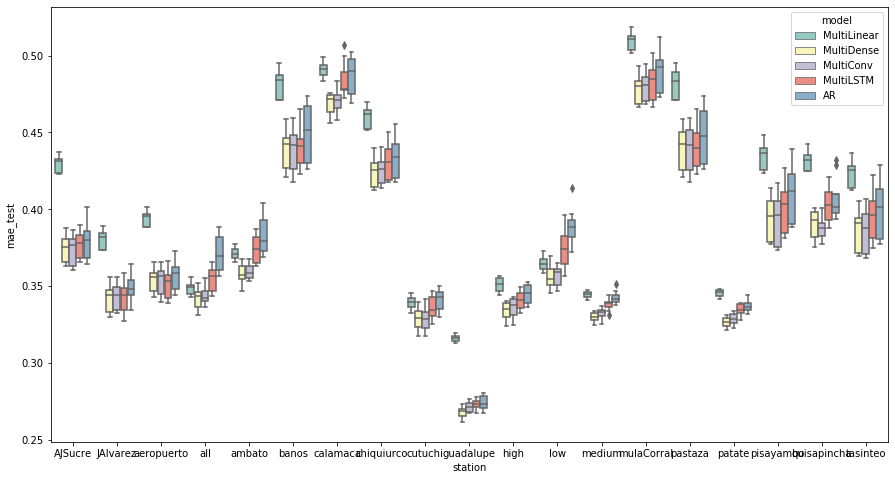

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x="station", y="mae_test", hue="model", data=results, palette="Set3") 

### ANOVA time

In [8]:
### 4 stations 60, 30, 15 and 5 minutes for 48 +24h predictions
results.window.unique()

array(['w24_12', 'w24_24', 'w48_12', 'w48_24', 'w48_48', 'w72_12',
       'w72_24', 'w72_48', 'w576_288', '24_20', 'w192_96', 'w96_48'],
      dtype=object)

In [9]:
results.window = results.window.replace(to_replace = ['w576_288','w192_96', 'w96_48'], value = 'w48_24')

In [13]:
df = results[(results['window'] == 'w48_24') & 
        (results['station'].isin(['guadalupe','baños','mulaCorral','quisapincha'])) & 
        (results['model']=='MultiLSTM') & (results['epochs']==20)]

In [14]:
df

,Unnamed: 0,loss_test,mae_test,loss_val,mae_val,epochs,window,freq,model,station
0,MultiLSTM_model_15m_w192_96,0.276341,0.271544,0.329214,0.312905,20,w48_24,15m,MultiLSTM,guadalupe
0,MultiLSTM_model_30m_w96_48,0.275769,0.273131,0.329437,0.313102,20,w48_24,30m,MultiLSTM,guadalupe
0,MultiLSTM_model_5m_w576_288,0.283038,0.273182,0.340439,0.315666,20,w48_24,5m,MultiLSTM,guadalupe
4,MultiLSTM_model_60m_w48_24,0.275618,0.273560,0.328397,0.315269,20,w48_24,60m,MultiLSTM,guadalupe
0,MultiLSTM_model_15m_w192_96,0.601342,0.475671,0.604503,0.457843,20,w48_24,15m,MultiLSTM,mulaCorral
0,MultiLSTM_model_30m_w96_48,0.604446,0.478184,0.595224,0.457835,20,w48_24,30m,MultiLSTM,mulaCorral
0,MultiLSTM_model_5m_w576_288,0.597058,0.470995,0.616320,0.458839,20,w48_24,5m,MultiLSTM,mulaCorral
4,MultiLSTM_model_60m_w48_24,0.612981,0.487472,0.602100,0.468679,20,w48_24,60m,MultiLSTM,mulaCorral
0,MultiLSTM_model_15m_w192_96,0.466806,0.402464,0.429982,0.382199,20,w48_24,15m,MultiLSTM,quisapincha
0,MultiLSTM_model_30m_w96_48,0.474784,0.404648,0.432624,0.385006,20,w48_24,30m,MultiLSTM,quisapincha


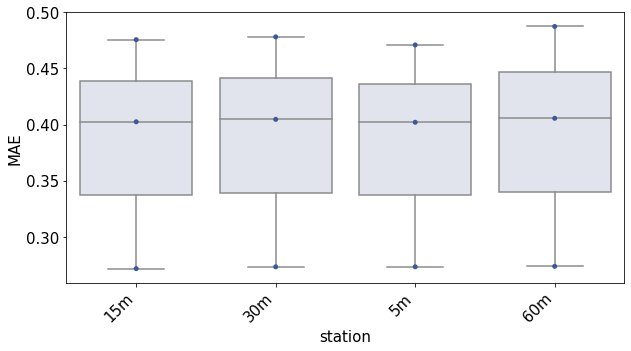

In [15]:
fig, ax =plt.subplots(figsize=(10,5))
ax = sns.boxplot(x='freq', y='mae_test', data=df, color='#DFE3EE')
ax = sns.swarmplot(x="freq", y="mae_test", data=df, color='#3B5998')
ax.set_xlabel('station',fontsize=15)
ax.set_ylabel("MAE",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(labels = df.freq.unique(),rotation = 45, ha="right")
plt.show()

plt.show()
fig.savefig(f'{path}/boxplot_freqs.png',dpi = 75,bbox_inches='tight')

In [18]:
res = stat()
res.anova_stat(df=results, res_var='mae_test', anova_model='mae_test ~ C(freq)')
res.anova_summary
### No significant difference. We keep hourly predictions

,df,sum_sq,mean_sq,F,PR(>F)
C(freq),3.0,0.000325,0.000108,0.033858,0.99164
Residual,716.0,2.289261,0.003197,NaN,NaN


### ANOVA epochs

In [16]:
### 4 stations 60, 30, 15 and 5 minutes for 48 +24h predictions
results.epochs.unique()

array([ 20, 100, 250,  50, 150])

In [26]:
df = results[(results['window'] == 'w48_24') & 
        (results['station'].isin(['guadalupe','baños','mulaCorral','quisapincha'])) & 
        (results['model']=='MultiLSTM')]

In [29]:
df= df[(df['epochs'] != 150)  & (df['freq'] == '60m')]

In [30]:
df

,Unnamed: 0,loss_test,mae_test,loss_val,mae_val,epochs,window,freq,model,station
0,MultiLSTM_model_60m_w48_24_100,0.276065,0.274050,0.329681,0.318016,100,w48_24,60m,MultiLSTM,guadalupe
0,MultiLSTM_model_60m_w48_24_250,0.277113,0.273634,0.334135,0.317318,250,w48_24,60m,MultiLSTM,guadalupe
0,MultiLSTM_model_60m_w48_24_50,0.274463,0.273793,0.331377,0.318425,50,w48_24,60m,MultiLSTM,guadalupe
4,MultiLSTM_model_60m_w48_24,0.275618,0.273560,0.328397,0.315269,20,w48_24,60m,MultiLSTM,guadalupe
0,MultiLSTM_model_60m_w48_24_100,0.608956,0.484971,0.600186,0.467660,100,w48_24,60m,MultiLSTM,mulaCorral
0,MultiLSTM_model_60m_w48_24_250,0.608108,0.483323,0.599340,0.463206,250,w48_24,60m,MultiLSTM,mulaCorral
0,MultiLSTM_model_60m_w48_24_50,0.611054,0.485654,0.597371,0.465570,50,w48_24,60m,MultiLSTM,mulaCorral
4,MultiLSTM_model_60m_w48_24,0.612981,0.487472,0.602100,0.468679,20,w48_24,60m,MultiLSTM,mulaCorral
0,MultiLSTM_model_60m_w48_24_100,0.476138,0.404731,0.431022,0.385071,100,w48_24,60m,MultiLSTM,quisapincha
0,MultiLSTM_model_60m_w48_24_250,0.478607,0.407073,0.428681,0.387155,250,w48_24,60m,MultiLSTM,quisapincha


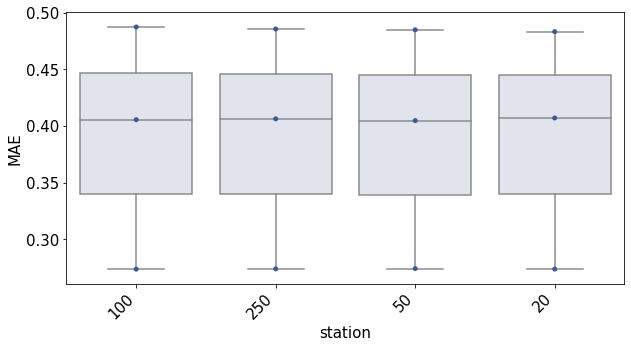

In [32]:
fig, ax =plt.subplots(figsize=(10,5))
ax = sns.boxplot(x='epochs', y='mae_test', data=df, color='#DFE3EE')
ax = sns.swarmplot(x="epochs", y="mae_test", data=df, color='#3B5998')
ax.set_xlabel('station',fontsize=15)
ax.set_ylabel("MAE",fontsize=15)
ax.tick_params(labelsize=15)
ax.set_xticklabels(labels = df.epochs.unique(),rotation = 45, ha="right")
plt.show()

plt.show()
fig.savefig(f'{path}/boxplot_epochs.png',dpi = 75,bbox_inches='tight')

In [95]:
res = stat()
res.anova_stat(df=results, res_var='mae_test', anova_model='mae_test ~ C(epochs)')
res.anova_summary
### No significant difference. We keep hourly predictions

,df,sum_sq,mean_sq,F,PR(>F)
C(epochs),4.0,0.003074,0.000768,0.236545,0.917744
Residual,728.0,2.365048,0.003249,NaN,NaN


In [ ]:
### No significative difference rainsing the epochs

### Compare more o less variables

In [6]:
d= {'data':['all_variables','all_variables','all_variables','reduced_variables','reduced_variables','reduced_variables'],
   'MAE':[0.362,0.362,0.356,0.339,0.335,0.335]}
data = pd.DataFrame(data = d)

In [5]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data, res_var='MAE', anova_model='MAE ~ C(data)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(data),1.0,0.000840,0.000840,96.942308,0.000597
Residual,4.0,0.000035,0.000009,NaN,NaN


In [8]:
res = stat()
res.tukey_hsd(df=data, res_var='MAE', xfac_var='data', anova_model='MAE ~ C(data)')
test = res.tukey_summary
test[test['p-value']<0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,all_variables,reduced_variables,0.023667,0.016993,0.03034,13.924246,0.001


In [12]:
print(np.mean([0.363,0.362,0.356]))
print(np.std([0.363,0.362,0.356]))

0.36033333333333334
0.0030912061651652374


In [13]:
print(np.mean([0.339,0.335,0.335]))
print(np.std([0.339,0.335,0.335]))

0.3363333333333334
0.0018856180831641283


In [14]:
he =[0.343,
0.346,
0.337,
0.341,
0.334,
0.346]

In [15]:
zero=[0.339,
0.335,
0.334,
0.336,
0.333,
0.335]

In [17]:
print(np.mean(he), np.std(he))
print(np.mean(zero), np.std(zero))

0.3411666666666667 0.004450343307606213
0.3353333333333333 0.0018856180831641283
